In [1]:
# import lib
import tensorflow as tf
import numpy as np
import sys, os,cv2
from sklearn.utils import shuffle
from scipy.misc import imread,imresize
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from skimage.transform import resize
from imgaug import augmenters as iaa
import imgaug as ia
from scipy.ndimage import zoom
from sklearn.utils import shuffle

In [2]:
# create data
n_examples, hidden_layer_dim = 100, 100
input_dim = 1000
X         = np.random.randn(n_examples, input_dim) # 100 examples of 1000 points
n_layers  = 20
layer_dim = [hidden_layer_dim] * n_layers # each one has 100 neurons

hs = [X]
zs = [X]
ws = []

In [3]:
# feed forward process 
for i in np.arange(n_layers):
    h = hs[-1] # get the input into this hidden layer
    W = np.random.normal(size = (layer_dim[i], h.shape[0])) * 0.01 # weight init: gaussian around 0
    z = np.dot(W, h)
    h_out = z * (z > 0)
    ws.append(W)
    zs.append(z)
    hs.append(h_out)

In [5]:
# performing derivative
dLdh    = 100 * np.random.randn(hidden_layer_dim, input_dim) # random incoming grad into our last layer
h_grads = [dLdh] # store the incoming grads into each layer
w_grads = [] # store dL/dw for each layer

In [6]:
# the backwards pass
for i in np.flip(np.arange(1, n_layers), axis = 0):
	# get the incoming gradient
	incoming_loss_grad = h_grads[-1]
	# backprop through the relu
	print(incoming_loss_grad.shape)
	dLdz = incoming_loss_grad * (zs[i] > 0)
	# get the gradient dL/dh_{i-1}, this will be the incoming grad into the next layer
	h_grad = ws[i-1].T.dot(dLdz)
	# get the gradient of the weights of this layer (dL/dw)
	weight_grad = dLdz.dot(hs[i-1].T)
	h_grads.append(h_grad)
	w_grads.append(weight_grad)

(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)


variance of linear units before relu is 0.9992563081913999
variance of activations is 0.9992563081913999
ratio is 1.0
variance of linear units before relu is 0.010068583887549231
variance of activations is 0.0034444908013064575
ratio is 2.923097917326511


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


variance of linear units before relu is 5.031150498066016e-05
variance of activations is 1.573165821362825e-05
ratio is 3.198105647698065
variance of linear units before relu is 2.0909900770826048e-07
variance of activations is 6.451874826468135e-08
ratio is 3.2409030449638276
variance of linear units before relu is 1.0070594875951457e-09
variance of activations is 3.925537493798001e-10
ratio is 2.5654053468759623
variance of linear units before relu is 5.207552063519412e-12
variance of activations is 2.0785006497412125e-12
ratio is 2.5054368225325248
variance of linear units before relu is 2.927445814208594e-14
variance of activations is 1.0009323149505369e-14
ratio is 2.9247190549075834
variance of linear units before relu is 1.424728437654572e-16
variance of activations is 3.771922831727866e-17
ratio is 3.7771940233515418
variance of linear units before relu is 5.170769771801085e-19
variance of activations is 1.7993499899552636e-19
ratio is 2.873687609784933
variance of linear units

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


variance of linear units before relu is 2.493138883908894e-47
variance of activations is 8.582149326609805e-48
ratio is 2.905028552904189


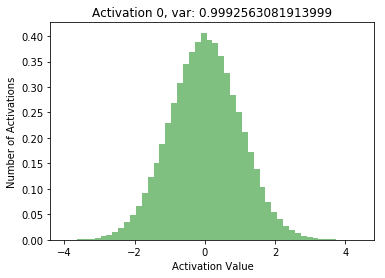

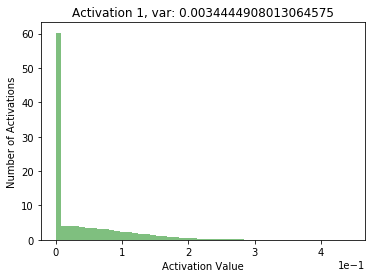

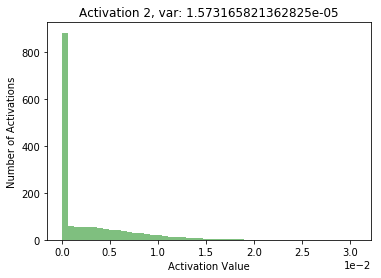

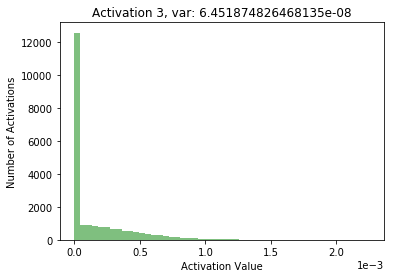

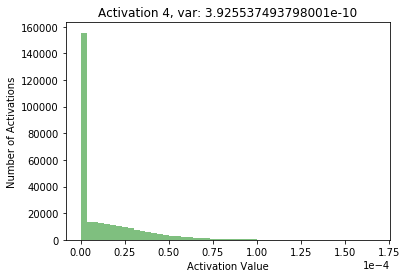

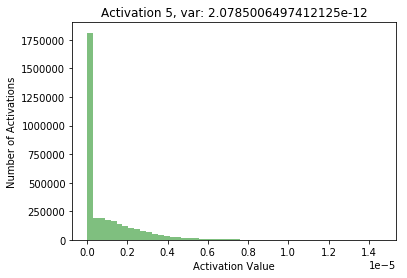

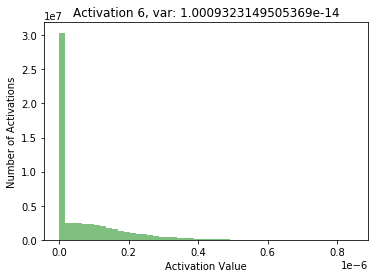

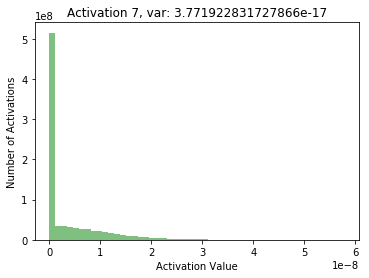

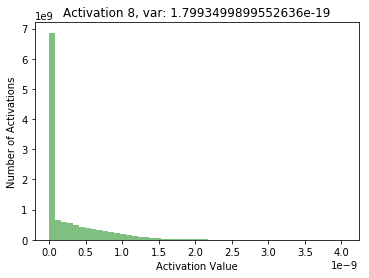

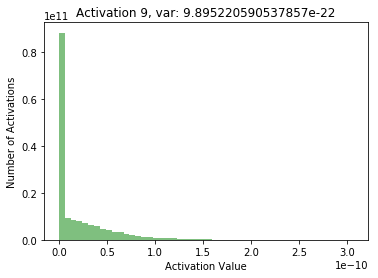

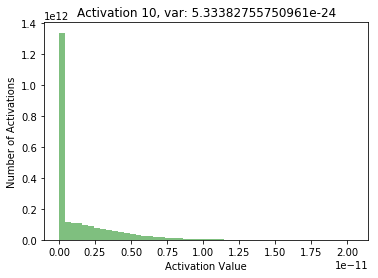

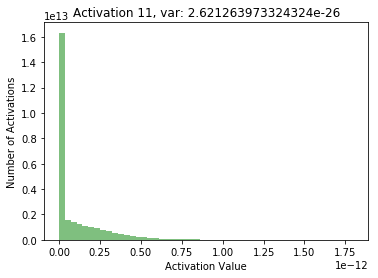

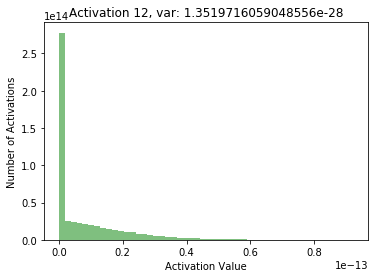

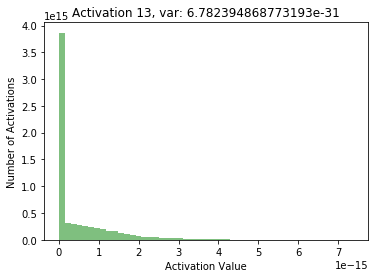

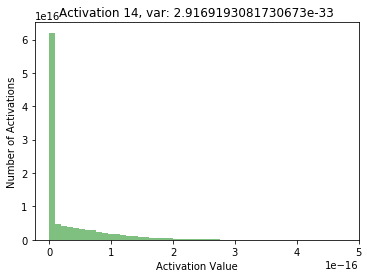

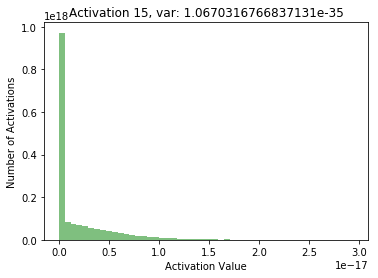

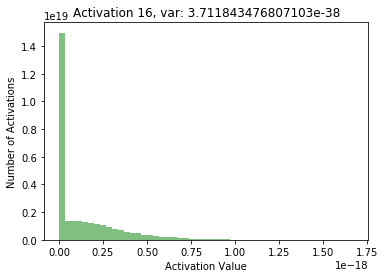

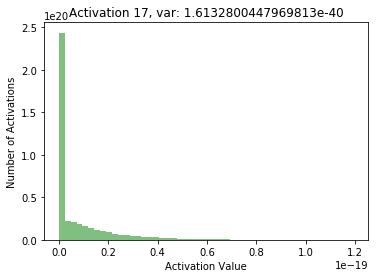

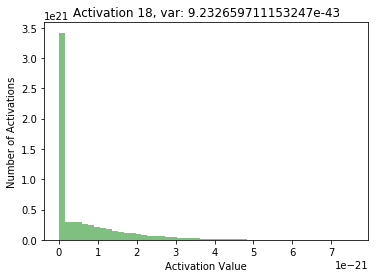

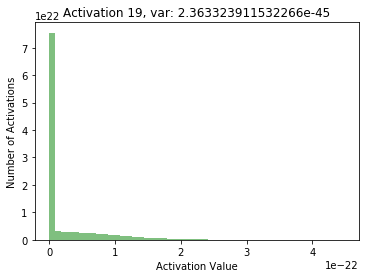

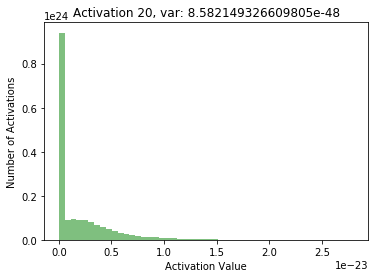

In [7]:
# plot the resulting activatiosn
for i, activation in enumerate(hs):
	fig = plt.figure()
	num_bins = 50
	print('variance of linear units before relu is {}'.format(np.var(zs[i].ravel())))
	print('variance of activations is {}'.format(np.var(activation.ravel())))
	ratio = np.var(zs[i].ravel()) / np.var(activation.ravel())
	print('ratio is {}'.format(ratio))
	n, bins, patches = plt.hist(activation.ravel(), num_bins, normed=1, facecolor='green', alpha=0.5)
	plt.title('Activation {}, var: {}'.format(i, np.var(activation.ravel())))
	plt.xlabel('Activation Value')
	plt.ylabel('Number of Activations')
	plt.subplots_adjust(left=0.15)
	plt.savefig('activation-plots/act-{}.png'.format(i))	
	plt.ticklabel_format(axis='x',style='sci',scilimits=(1,4))

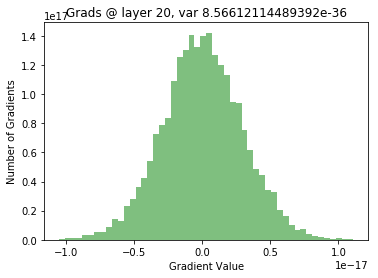

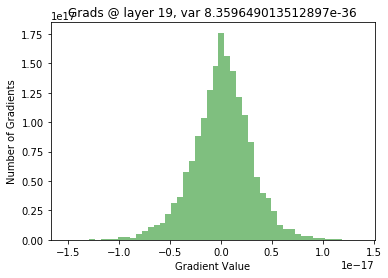

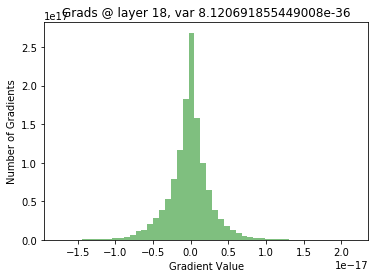

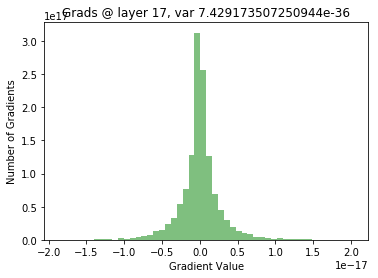

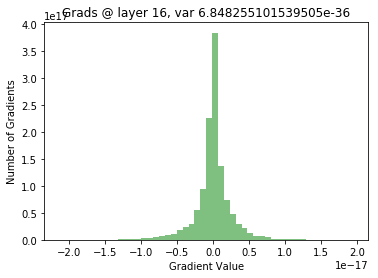

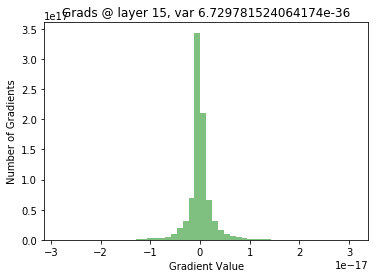

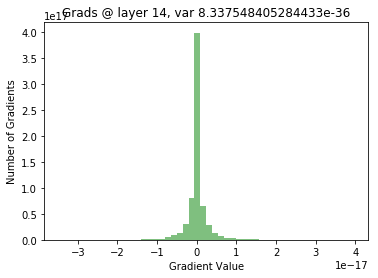

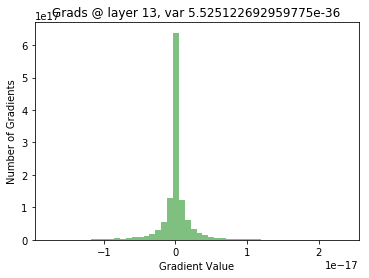

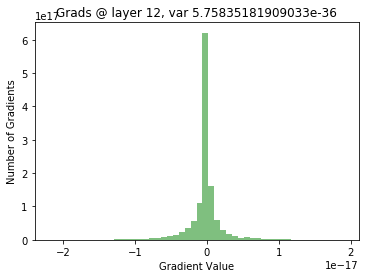

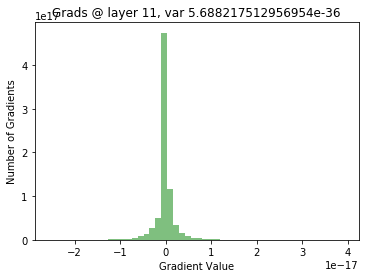

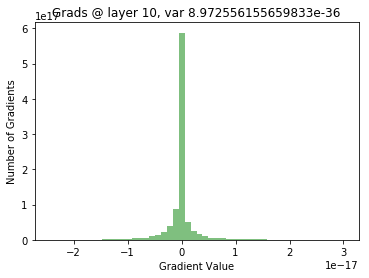

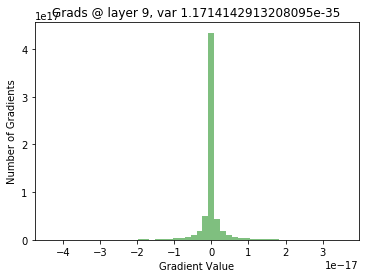

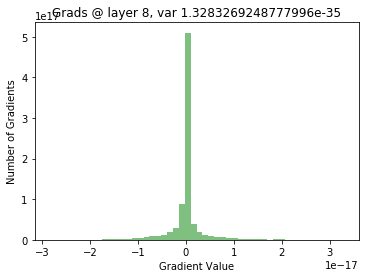

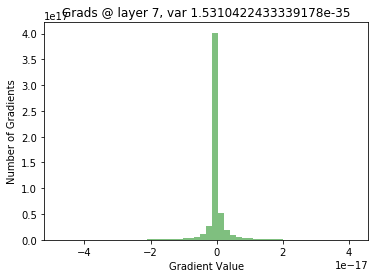

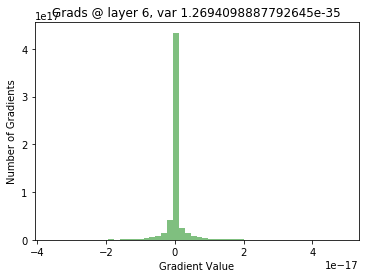

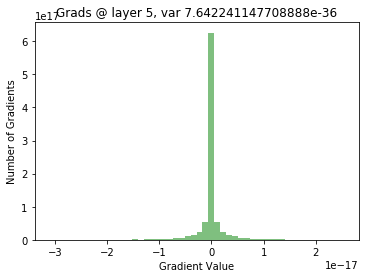

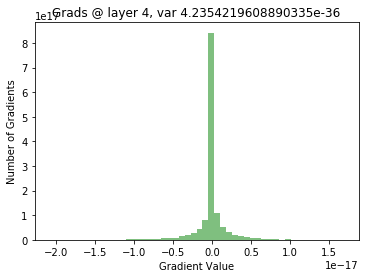

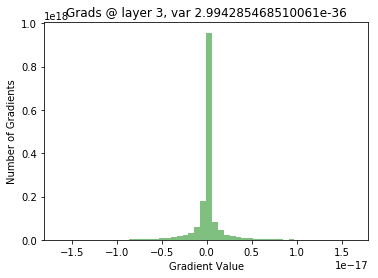

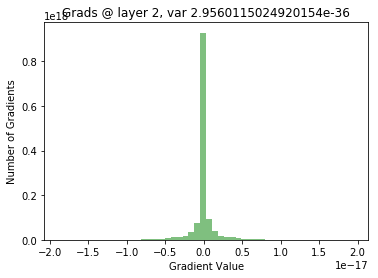

In [8]:
# gradients
w_grads = list(reversed(w_grads))
for i, grad in enumerate(w_grads):
	fig = plt.figure()
	num_bins = 50
	n, bins, patches = plt.hist(grad.ravel(), num_bins, normed=1, facecolor='green', alpha=0.5)
	plt.title('Grads @ layer {}, var {}'.format(n_layers - i, np.var(grad.ravel())))
	plt.xlabel('Gradient Value')
	plt.ylabel('Number of Gradients')
	plt.subplots_adjust(left=0.15)
	plt.savefig('gradient-plots/grad-{}.png'.format(i))	
	plt.ticklabel_format(axis='x',style='sci',scilimits=(1,4))

<h1> 
    What we can see from above is the fact that, gradient is almost zero. 
    <br/> 
    Is the fact that gradients that are near zero this means that none of the weights are getting "proper" updates. 
    And this is a problem. Why? Since the weights are not getting any gradient updates, the whole process of training, is dependent on the gradient.
    That is coming into the weigths. 

</h1>

<h2>
    This is the second line of the stuffs. 
</h2>

In [9]:
! git add .
! git commit -m "from mac"
! git push

[master 2df24e9e] from mac
 42 files changed, 64 insertions(+), 32 deletions(-)
 rewrite Class Stuff/principal_component_analysis_regularization/activation-plots/act-0.png (98%)
 rewrite Class Stuff/principal_component_analysis_regularization/activation-plots/act-1.png (97%)
 rewrite Class Stuff/principal_component_analysis_regularization/activation-plots/act-10.png (99%)
 rewrite Class Stuff/principal_component_analysis_regularization/activation-plots/act-11.png (98%)
 rewrite Class Stuff/principal_component_analysis_regularization/activation-plots/act-12.png (98%)
 rewrite Class Stuff/principal_component_analysis_regularization/activation-plots/act-13.png (98%)
 rewrite Class Stuff/principal_component_analysis_regularization/activation-plots/act-14.png (98%)
 rewrite Class Stuff/principal_component_analysis_regularization/activation-plots/act-15.png (98%)
 rewrite Class Stuff/principal_component_analysis_regularization/activation-plots/act-16.png (99%)
 rewrite Class Stuff/principal_